# IPL Venue and Toss Analysis

In [28]:
##importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [29]:
##loading the csv files into dataframes
df = pd.read_csv("./ipl_data/IPL Matches 2008-2020.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

## Dropping all the redundant columns

In [30]:
df.drop(labels = ['id', 'date', 'player_of_match', 'neutral_venue', 'result', 'result_margin', 'eliminator', 'method','umpire1', 'umpire2'], axis = 1,inplace = True)


In [31]:
df

,city,venue,team1,team2,toss_winner,toss_decision,winner
0,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
2,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils
3,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
4,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders
...,...,...,...,...,...,...,...
811,Dubai,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore
812,Dubai,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians
813,Abu Dhabi,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad
814,Abu Dhabi,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals


## Q: Does batting or bowling first matter?

In [32]:
bat_first_win = bat_first_loss = bowl_first_win = bowl_first_lose = 0

## for all the matches, check the toss decision and match decision
for i in range(len(df)) : 
    if df.toss_decision.iloc[i] == 'bat' :   
        if df.toss_winner.iloc[i] == df.winner.iloc[i] : 
            bat_first_win += 1
        else :
            bat_first_loss += 1
    else :          
        if df.toss_winner.iloc[i] == df.winner.iloc[i] : 
            bowl_first_win += 1
        else :
            bowl_first_lose += 1
            

print(f"{bat_first_win} times teams that choose batting first, win the match.")
print(f"{bat_first_loss} times teams that choose batting first, lose the match.")
print(f"{bowl_first_win} times teams that choose bowling first, and win the match.")
print(f"{bowl_first_lose} times teams that choose bowling first, but lose the match.")


145 times teams that choose batting first, win the match.
175 times teams that choose batting first, lose the match.
273 times teams that choose bowling first, and win the match.
223 times teams that choose bowling first, but lose the match.


In [9]:
## adding this stat to the dataframe
df[['target_setter_won', 'chasing_team_won']] = 0

for i in range(len(df)) : 
    if df.toss_decision.iloc[i] == 'bat' :    
        if df.toss_winner.iloc[i] == df.winner.iloc[i] : 
            # captain choose batting option and win the match then it will count as target.
            df['target_setter_won'].iloc[i] = 1       
        else :
            # captain choose batting option and loose the match then it will count as chasing.
            df['chasing_team_won'].iloc[i] = 1   
    else :          
        if df.toss_winner.iloc[i] == df.winner.iloc[i] : 
            # captain choose fielding option and win the match then it will count in chasing.
            df['chasing_team_won'].iloc[i] = 1   
        else :
            # captain choose fielding option and loose the match then it will count in target.
            df['target_setter_won'].iloc[i] = 1

In [10]:
df

,city,venue,team1,team2,toss_winner,toss_decision,winner,target_setter_won,chasing_team_won
0,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,0
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,1,0
2,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,0,1
3,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,0,1
4,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,0,1
...,...,...,...,...,...,...,...,...,...
811,Dubai,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,1,0
812,Dubai,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,1,0
813,Abu Dhabi,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,0,1
814,Abu Dhabi,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,1,0


#### But is this enough? We get the general view but toss decision relies heavily on the venue of the match!

## Looking at toss decision in conjunction with Venue

In [11]:
df['venue'].value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

In [12]:
top_10_stadiums = df['venue'].value_counts()[:10].index.tolist()
top_10_stadiums

['Eden Gardens',
 'Feroz Shah Kotla',
 'Wankhede Stadium',
 'M Chinnaswamy Stadium',
 'Rajiv Gandhi International Stadium, Uppal',
 'MA Chidambaram Stadium, Chepauk',
 'Sawai Mansingh Stadium',
 'Punjab Cricket Association Stadium, Mohali',
 'Dubai International Cricket Stadium',
 'Sheikh Zayed Stadium']

### Study the number of times batting first or bowling first team won at each stadium

In [27]:
targetlist = []
chaselist = []


for i in top_10_stadiums: 
    print(f"Analysis on {i} Stadium")
    target_wins = np.sum(df[df.venue == i].target_setter_won)
    chase_wins = np.sum(df[df.venue == i].chasing_team_won)
    
    print(target_wins, 'times target setters won the match')
    print(chase_wins, 'times chasing team won the match.') 
    
    targetlist.append(target_wins)
    chaselist.append(chase_wins)
    print()


Analysis on Eden Gardens Stadium
30 times target setters won the match
47 times chasing team won the match.

Analysis on Feroz Shah Kotla Stadium
34 times target setters won the match
40 times chasing team won the match.

Analysis on Wankhede Stadium Stadium
36 times target setters won the match
37 times chasing team won the match.

Analysis on M Chinnaswamy Stadium Stadium
28 times target setters won the match
37 times chasing team won the match.

Analysis on Rajiv Gandhi International Stadium, Uppal Stadium
27 times target setters won the match
37 times chasing team won the match.

Analysis on MA Chidambaram Stadium, Chepauk Stadium
35 times target setters won the match
22 times chasing team won the match.

Analysis on Sawai Mansingh Stadium Stadium
15 times target setters won the match
32 times chasing team won the match.

Analysis on Punjab Cricket Association Stadium, Mohali Stadium
15 times target setters won the match
20 times chasing team won the match.

Analysis on Dubai Inter

## Plotting the wins based on toss decisions at the top venues

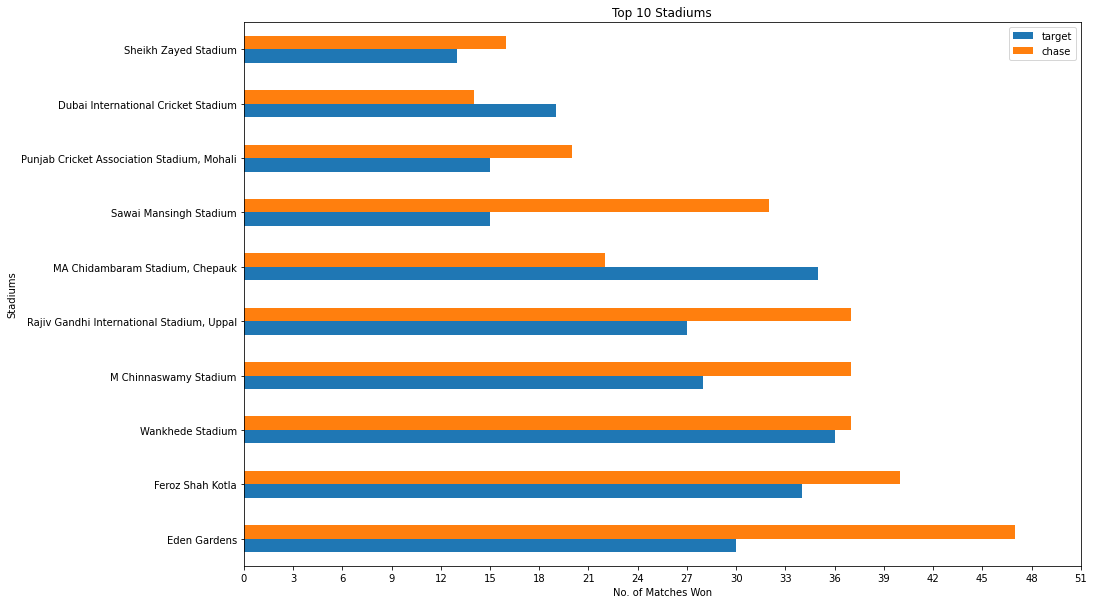

In [15]:
data = {'target': targetlist,
        'chase': chaselist}
## creating a dataframe of the dictionary
df1 = pd.DataFrame(data, columns=['target', 'chase'], index = top_10_stadiums)

df1.plot.barh(figsize = (15,10))
plt.style.use('seaborn-bright') # style and color
plt.title('Top 10 Stadiums')
plt.ylabel('Stadiums')
plt.xlabel('No. of Matches Won')
plt.xticks(np.arange(0, 54, 3))
plt.show()

## Calculating the probability - chance of winning with a toss decision

In [21]:
bat_first_win_perc = []
bowl_first_win_perc = []

for i in top_10_stadiums : 
    print(i)
    
    # x is total number of matches won at ith stadium when they batted first
    x = np.sum(df[df.venue == i].target_setter_won) 
    
    # y is total number of matches won at ith stadium when they bowled first
    y = np.sum(df[df.venue == i].chasing_team_won)
    
    # total number of matches won
    total = x + y
    
    # winning % for when team batted first
    t = ((x / total) * 100)
    
    # winning % when a team chases
    c = ((y / total) * 100)
    
    bat_first_win_perc.append(round(t, 2))
    bowl_first_win_perc.append(round(c, 2))
    
    print('{:.2f}% probablity that if you choose to bat, then you will win the match.'.format((x / total) * 100))
    print('{:.2f}% probability that if you choose to field, then you will win the match.'.format((y / total) * 100))
    print()

Eden Gardens
38.96% probablity that if you choose to bat, then you will win the match.
61.04% probability that if you choose to field, then you will win the match.

Feroz Shah Kotla
45.95% probablity that if you choose to bat, then you will win the match.
54.05% probability that if you choose to field, then you will win the match.

Wankhede Stadium
49.32% probablity that if you choose to bat, then you will win the match.
50.68% probability that if you choose to field, then you will win the match.

M Chinnaswamy Stadium
43.08% probablity that if you choose to bat, then you will win the match.
56.92% probability that if you choose to field, then you will win the match.

Rajiv Gandhi International Stadium, Uppal
42.19% probablity that if you choose to bat, then you will win the match.
57.81% probability that if you choose to field, then you will win the match.

MA Chidambaram Stadium, Chepauk
61.40% probablity that if you choose to bat, then you will win the match.
38.60% probability that

In [22]:
## dataframe to have a 
data = {'Bat_first': bat_first_win_perc,
        'Field_first': bowl_first_win_perc}
df2 = pd.DataFrame(data,columns=['Bat_first', 'Field_first'], index = top_10_stadiums)
df2

,Bat_first,Field_first
Eden Gardens,38.96,61.04
Feroz Shah Kotla,45.95,54.05
Wankhede Stadium,49.32,50.68
M Chinnaswamy Stadium,43.08,56.92
"Rajiv Gandhi International Stadium, Uppal",42.19,57.81
"MA Chidambaram Stadium, Chepauk",61.40,38.60
Sawai Mansingh Stadium,31.91,68.09
"Punjab Cricket Association Stadium, Mohali",42.86,57.14
Dubai International Cricket Stadium,57.58,42.42
Sheikh Zayed Stadium,44.83,55.17


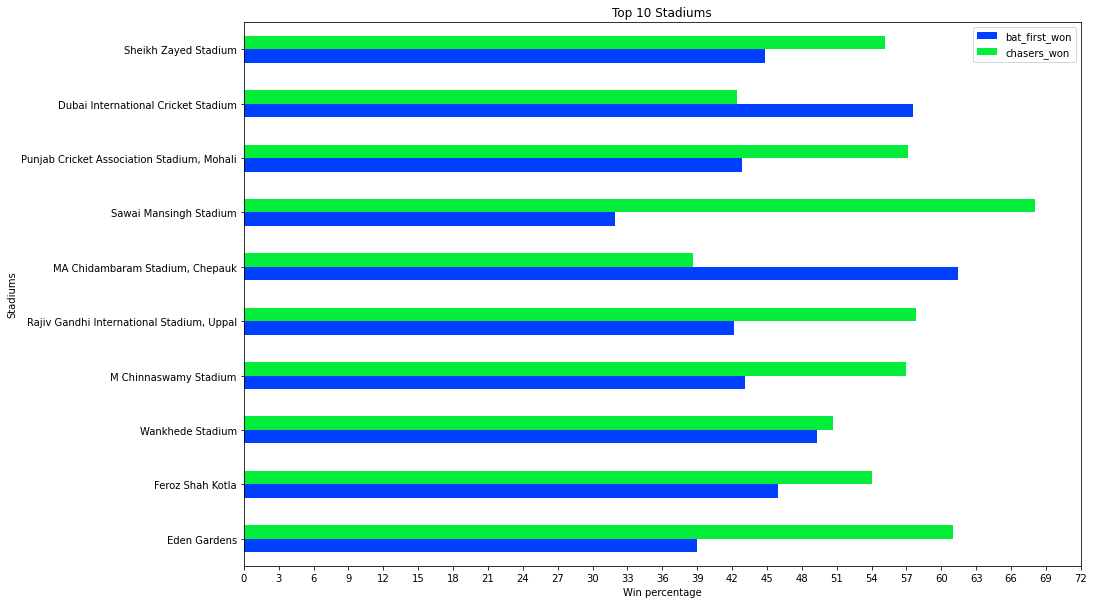

In [25]:
data = {'bat_first_won': bat_first_win_perc,
        'chasers_won': bowl_first_win_perc}

df1 = pd.DataFrame(data,columns=['bat_first_won', 'chasers_won'], index = top_10_stadiums)
df1.plot.barh(figsize = (15,10))

plt.style.use('seaborn-bright')
plt.title('Top 10 Stadiums')
plt.ylabel('Stadiums')
plt.xlabel('Win percentage')
plt.xticks(np.arange(0, 75, 3))
plt.show()